## This isn't working!!

Next step is to read some scipy.optimize documentation

In [1]:
import numpy as np
import math

x_positions = range(0, 6)
y_positions = range(0, 5)
data = np.array([
    [1.0, 2.0, 1.5, 1.5, 2.25, 1.75],
    [1.0, 2.0, 1.5, 1.5, 2.25, 1.75],
    [1.0, 2.0, 1.5, 2.25, 2.0, 1.75],
    [1.0, 4.0, 1.5, 1.5, 2.25, 1.75],
    [1.0, 2.0, 1.25, 1.75, 2.0, 1.5]
])

BACKGROUND_MODEL_PARAMETER = 0
POSITION_X_MODEL_PARAMETER = 1
POSITION_Y_MODEL_PARAMETER = 2
SPIKE_FLUX_MODEL_PARAMETER = 3

In [2]:
def make_model(background, spike_position, spike_radius, spike_flux):
    normalization = spike_flux / (2 * math.pi * spike_radius)
    def f(i, j):
        distance_x = abs(i - spike_position[0])
        distance_y = abs(j - spike_position[1])
        distance_squared = distance_x**2 + distance_y**2
        height = normalization * math.exp(-0.5 * distance_squared / spike_radius**2)
        return background + height
    return f


In [3]:
def variance(model, data):
    shape = data.shape
    sum = 0.0
    for j in range(shape[0]):
        for i in range(shape[1]):
            difference = model(i, j) - data[j, i]
            sum += difference**2
    return sum


In [4]:
def objective_function(model_parameters, data, spike_radius):
    background = model_parameters[BACKGROUND_MODEL_PARAMETER]
    spike_position_x = model_parameters[POSITION_X_MODEL_PARAMETER]
    spike_position_y = model_parameters[POSITION_Y_MODEL_PARAMETER]
    spike_flux = model_parameters[SPIKE_FLUX_MODEL_PARAMETER]
    model = make_model(background, (spike_position_x, spike_position_y), spike_radius, spike_flux)
    return variance(model, data)


### Make our initial guesses

In [5]:
### Make our initial guesses

background0 = np.median(data)

# maximum = 0.0
# index_x = 0
# index_y = 0
# for j in y_positions:
#     for i in x_positions:
#         if data[j, i] > maximum:
#             maximum = data[j, i]
#             index_x = i
#             index_y = j

# spike_flux0 = maximum - background0
# spike_position_x0 = index_x
# spike_position_y0 = index_y
spike_flux0 = 1.0
spike_position_x0 = 4
spike_position_y0 = 4

x0 = (background0, spike_position_x0, spike_position_y0, spike_flux0)

In [6]:
from scipy.optimize import minimize

spike_radius = 1.0

result = minimize(objective_function, x0=x0, args=(data, spike_radius)).x

In [7]:
background = result[BACKGROUND_MODEL_PARAMETER]
spike_position_x = result[POSITION_X_MODEL_PARAMETER]
spike_position_y = result[POSITION_Y_MODEL_PARAMETER]
spike_flux = result[SPIKE_FLUX_MODEL_PARAMETER]

model = make_model(background, (spike_position_x, spike_position_y), spike_radius, spike_flux)
values = [[model(i, j) for i in x_positions] for j in y_positions]

### Plot the data and the fit

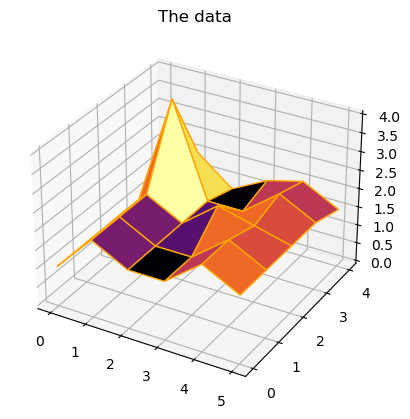

In [8]:
# importing libraries
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
 
# defining surface and axes
x = np.outer(x_positions, np.ones(5)).T
y = np.outer(y_positions, np.ones(6))
z = np.array(data)
 
fig = plt.figure()
 
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
 
# syntax for plotting
ax.plot_surface(x, y, z, cmap='inferno', edgecolor='orange')
ax.set_title('The data')

ax.axes.set_zlim3d(bottom=0, top=4) 

plt.show()

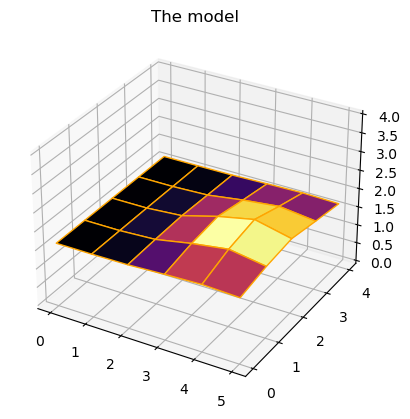

In [9]:
z = np.array(values)

fig = plt.figure()
 
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
 
# syntax for plotting
ax.plot_surface(x, y, z, cmap='inferno', edgecolor='orange')
ax.set_title('The model')
ax.axes.set_zlim3d(bottom=0, top=4) 
plt.show()

In [10]:
(background, (spike_position_x, spike_position_y), spike_radius, spike_flux)

(1.6262867702581796,
 (3.963102386374188, 1.8621938326929375),
 1.0,
 3.4292089538232866)